
Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

**Processamento de Imagens Digitais**

Professor Leandro Alves Neves

Alunos: 
* Giovanna Carreira Marinho;
* Guilherme Francisco de Andrade Campos;
* Julia Rodrigues Gubolin;
* Thales Ricardo de Souza Lopes.

**Aula 06 - Filtragem linear e não linear**

**Exercício 4**: Crie um programa para gerar discretamente máscaras 3x3, 5x5 e 7x7 representativas de filtros gaussianos. Use a os coeficientes da expansão binomial de Newton. Para cada máscara, calcule o valor de δ.

**Exercício 6**: Aplique sobre cada imagem indicada a seguir os ruídos aditivos: sal e pimenta; uniforme e gaussiano. As distribuições devem ser fornecidas pelo usuário. Aplique os filtros apresentados abaixo.

**a)** Suavização da imagem (Média, Mediana, Gaussiano, Mínimo, Máximo e da Moda, com janelas de 3x3 e 5x5;

**b)** Filtro Passa-Alta com as máscaras: h1 e h2.

**c)** Considerando i como sendo cada imagem dada como entrada, determine qual filtro indicou o melhor resultado visual î. Em seguida, use ao menos três métricas para avaliar a qualidade de î e confirmar sua hipótese.

In [ ]:
import skimage.io, skimage.exposure, skimage.util
import skimage.metrics
import sklearn.metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from math import e
from random import seed
from random import randint
from random import random

# Máscara de Filtro gaussiano

Utiliza as respectivas linhas do triângulo de Pascal para gerar um array com os valores da linha escolhida, sendo elas as linhas 3, 5 e 7.

In [ ]:
def get_pascal_Triangle(size = 3):
  if size == 3:
    pascal_line = np.array([[1], [2], [1]], dtype=np.uint32)
  elif size == 5:
    pascal_line = np.array([[1],[4], [6], [4], [1]], dtype=np.uint32)
  elif size == 7:
    pascal_line = np.array([[1], [6], [15], [20], [15], [6], [1]], dtype=np.uint32)

  delta = np.sqrt((size-1)/2)

  return pascal_line, delta

Recebe o array da linha do triângulo de Pascal e multiplica ela pela transposta para gerar a matriz do filtro gaussiano. Também printa o desvio padrão.

In [ ]:
def get_Gaussian_Filter(size = 3):
  line, delta = get_pascal_Triangle(size)
  gaussian_filter = np.matmul(line, np.transpose(line))

  print(f"Desvio padrão: {delta}")
  print(f"\nFiltro Gaussiano: \n {gaussian_filter}")

  return gaussian_filter.astype(int)

In [ ]:
get_Gaussian_Filter(5)

Desvio padrão: 1.4142135623730951

Filtro Gaussiano: 
 [[ 1  4  6  4  1]
 [ 4 16 24 16  4]
 [ 6 24 36 24  6]
 [ 4 16 24 16  4]
 [ 1  4  6  4  1]]


array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

# Filtro da média

In [ ]:
def filtro_media(image, size=3, useMasc = False, masc = np.array):
  if useMasc:
    size = masc.shape[0]
  else:
    masc = np.ones((size, size))
  M, N = image.shape
  g = np.zeros((M,N))
  center = np.floor(size/2).astype(int)

  for m in range(M-(size-1)):
    for n in range(N-(size-1)):
      soma = 0
      for i in range(size):
        for j in range(size):
          soma = soma + masc[i][j] * image[m+i][n+j]
      media = soma/np.sum(masc)
      g[center+m][center+n] = media

  return g

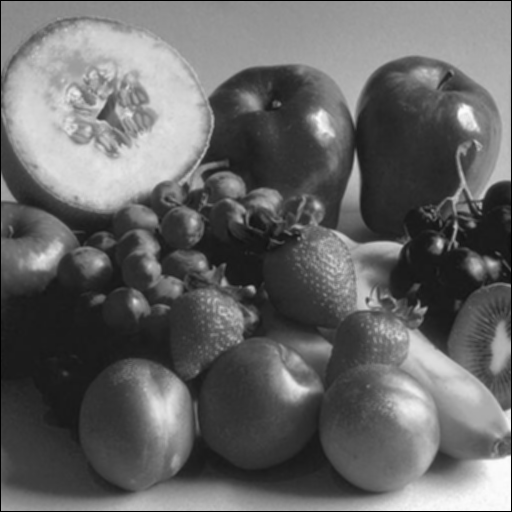

In [ ]:
img = cv.imread("/content/sample_data/frutas.bmp")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
masc = np.array([[1,2,1],[2,4,2],[1,2,1]]) # define uma máscara específica
filter_img = filtro_media(img, 3, useMasc=False, masc=masc) # se useMasc é True, usa a máscara definida manualmente
                                                            # se useMasc é falso, gera uma máscara cheia de 1
cv2_imshow(filter_img)

# Filtro da mediana

In [ ]:
def filtro_mediana(imagem_ruidosa, mascara=3):
    bd = int(mascara / 2)
    mediana_img = np.zeros_like(imagem_ruidosa)
    for i in range(bd, imagem_ruidosa.shape[0] - bd):
        for j in range(bd, imagem_ruidosa.shape[1] - bd):
            kernel = np.ravel(imagem_ruidosa[i - bd : i + bd + 1, j - bd : j + bd + 1])
            mediana = np.sort(kernel)[np.int8(np.divide((np.multiply(mascara, mascara)), 2) + 1)]
            mediana_img[i, j] = mediana
    return mediana_img

In [ ]:
img = cv.imread("/content/sample_data/frutas.bmp")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mediana3x3 = filtro_mediana(gray, 3)
mediana5x5 = filtro_mediana(gray, 5)
cv2_imshow(mediana3x3)
cv2_imshow(mediana5x5)
# cv.waitKey(0)

# Filtro Gaussiano

essa usa o filtro gaussiano com base a curva normal

[[0.01502176 0.0247667  0.04083339 0.06732287 0.11099665]
 [0.00335181 0.11099665 0.06732287 0.04083339 0.0247667 ]
 [0.0055262  0.06732287 0.11099665 0.0247667  0.04083339]
 [0.06732287 0.0055262  0.00335181 0.01502176 0.00911116]
 [0.11099665 0.00335181 0.0055262  0.00911116 0.01502176]]


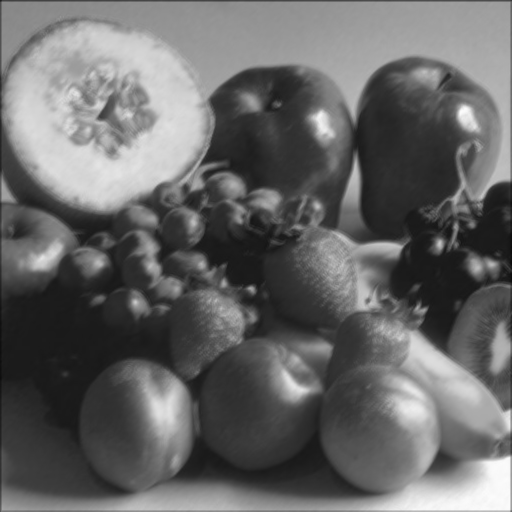

In [ ]:
img = cv.imread('/content/sample_data/frutas.bmp')
I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Desvio padrão da distribuição
sigma = 1;
# Máscara 5x5
mascara = np.zeros((5,5));
W = 0;

# Obter a exponencial de e^n
def getExp(n):
  return e**n

#Filtro
for i in range (0, 5):
    for j in range (0, 5):
        sq_dist = (i-3)^2+(j-3)^2;
        mascara[i,j] = getExp(-1*(sq_dist)/(2*sigma*sigma));
        W = W + mascara[i,j];

mascara = mascara/W;

# Aplicação do filtro na imagem
[m,n] = np.shape(I);
saida = np.zeros((m,n), dtype=np.uint8);
Im = np.pad(I, [2,2]);

print(mascara)

for i in range(0, m):
    for j in range(0, n):
        temp = Im[i:i+5, j:j+5];
        temp = np.double(temp);
        conv = np.multiply(temp, mascara);
        saida[i,j] = np.sum(conv[:])


cv2_imshow(saida)

essa usa o filtro gaussiano discreto

In [ ]:
def filtro_gaussiano(image, size = 3):
  M, N = image.shape
  g = np.zeros((M,N))
  center = np.floor(size/2).astype(int)
  masc = get_Gaussian_Filter(size)

  for m in range(M-(size-1)):
    for n in range(N-(size-1)):
      soma = 0
      for i in range(size):
        for j in range(size):
          soma = soma + image[m+i][n+j] * masc[i][j]
      g[center+m][center+n] = soma/np.sum(masc)

  return g

Desvio padrão: 0.7071067811865476

Filtro Gaussiano: 
 [[1 2 1]
 [2 4 2]
 [1 2 1]]


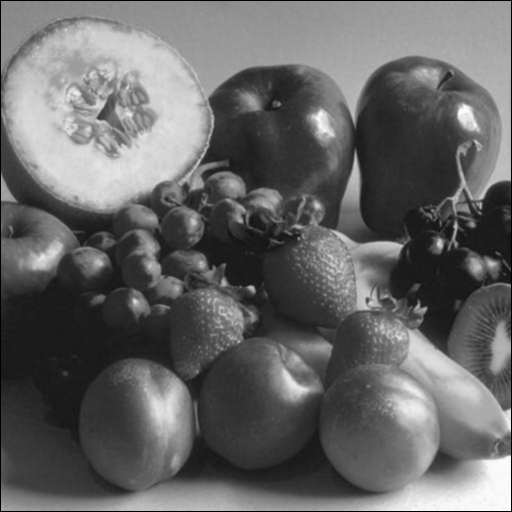

In [ ]:
img = cv.imread("/content/sample_data/frutas.bmp")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filter_img = filtro_gaussiano(img, 3)
cv2_imshow(filter_img)

# Filtro mínimo

In [ ]:
def filtro_minimo(image, size = 3):
  M, N = image.shape
  g = np.zeros((M,N))
  center = np.floor(size/2).astype(int)

  for m in range(M-(size-1)):
    for n in range(N-(size-1)):
      min = np.inf
      for i in range(size):
        for j in range(size):
          if image[m+i][n+j] < min:
            min = image[m+i][n+j]
      g[center+m][center+n] = min
  return g

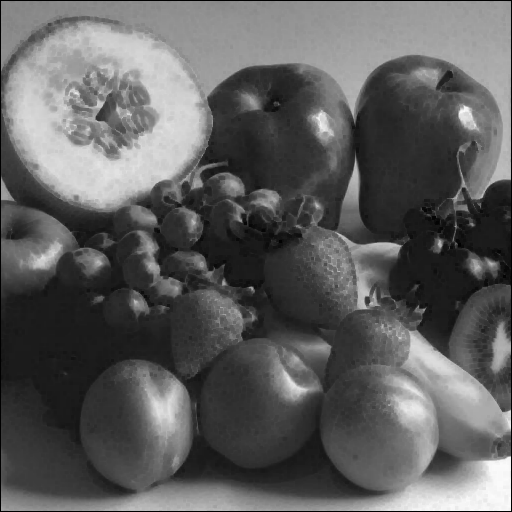

In [ ]:
img = cv.imread("/content/sample_data/frutas.bmp")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filter_img = filtro_minimo(img, 3)
cv2_imshow(filter_img)

# Filtro máximo

In [ ]:
def filtro_maximo(image, size = 3):
  M, N = image.shape
  g = np.zeros((M,N))
  center = np.floor(size/2).astype(int)

  for m in range(M-(size-1)):
    for n in range(N-(size-1)):
      max = 0
      for i in range(size):
        for j in range(size):
          if image[m+i][n+j] > max:
            max = image[m+i][n+j]
      g[center+m][center+n] = max
  return g

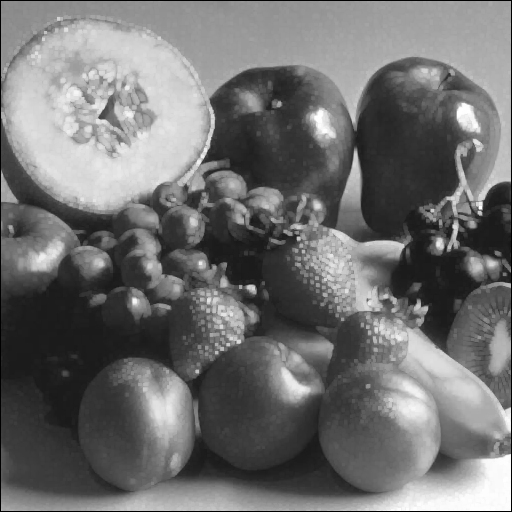

In [ ]:
img = cv.imread("/content/sample_data/frutas.bmp")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filter_img = filtro_maximo(img, 3)
cv2_imshow(filter_img)

# Filtro da moda

In [ ]:
def filtro_moda(image, size = 3, deepLevels = 256):
  M, N = image.shape
  g = np.zeros((M,N))
  center = np.floor(size/2).astype(int)

  for m in range(M-(size-1)):
    for n in range(N-(size-1)):
      count = np.zeros(deepLevels)
      for i in range(size):
        for j in range(size):
            intensity = image[m+i][n+j]
            count[int(intensity)] += 1
      g[center+m][center+n] = np.argmax(count)
  return g

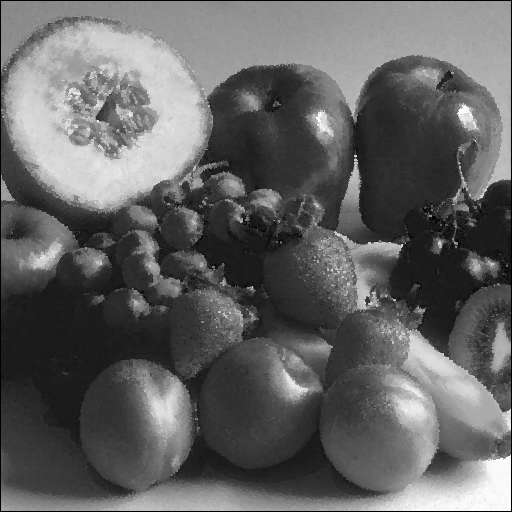

In [ ]:
img = cv.imread("/content/sample_data/frutas.bmp")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
filter_img = filtro_moda(img, 3)
cv2_imshow(filter_img)

# Filtro passa-alta

In [ ]:
def filtro_passa_alta(image, useMasc = 1):
  if useMasc == 1:
    masc = np.array([[0, -1, 0], [-1, 9, -1], [0, -1, 0]])
  else:
    masc = np.array([[-1, -1, -1], [-1, 17, -1], [-1, -1, -1]])

  print(masc)
  size = masc.shape[0]

  M, N = image.shape
  g = np.zeros((M,N))
  center = np.floor(size/2).astype(int)

  for m in range(M-(size-1)):
    for n in range(N-(size-1)):
      soma = 0
      for i in range(size):
        for j in range(size):
            soma = soma + image[m+i][n+j] * masc[i][j]
      if useMasc == 1:
        g[center+m][center+n] = soma/5
      else:
        g[center+m][center+n] = soma/9

  return g

# Métrica

In [ ]:
def root_mean_square_error(f, g):
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      power_sub = (f[i, j] - g[i, j])**2
      sum += power_sub
  
  return np.sqrt(sum/(N*M))

# Resolução do exercicio 6-a)

5.96136474609375
1147.6900939941406
33.877575090229534


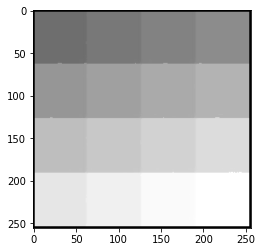

In [ ]:
img = cv.imread("/content/sample_data/e.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

probability = 0.05
salt_noised_img = skimage.util.random_noise(img, mode='s&p', amount=probability)*255

filter_img = filtro_mediana(salt_noised_img, 5)

plt.imshow(filter_img, cmap="gray", vmin=0, vmax=255)

print(sklearn.metrics.mean_absolute_error(img, filter_img))
print(sklearn.metrics.mean_squared_error(img, filter_img))
print(root_mean_square_error(img, filter_img))

Desvio padrão: 1.4142135623730951

Filtro Gaussiano: 
 [[ 1  4  6  4  1]
 [ 4 16 24 16  4]
 [ 6 24 36 24  6]
 [ 4 16 24 16  4]
 [ 1  4  6  4  1]]
11.633268675300716
1202.1796419066368
34.672462299447886


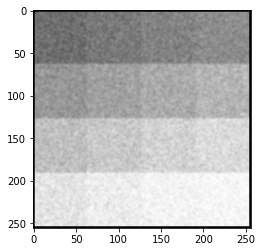

In [ ]:
img = cv.imread("/content/sample_data/e.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gaussian_noised_img = skimage.util.random_noise(img, mode='gaussian', mean=0, var=0.01)*255

filter_img = filtro_gaussiano(gaussian_noised_img, 5)

plt.imshow(filter_img, cmap="gray", vmin=0, vmax=255)

print(sklearn.metrics.mean_absolute_error(img, filter_img))
print(sklearn.metrics.mean_squared_error(img, filter_img))
print(root_mean_square_error(img, filter_img))

In [ ]:
def apply_uniform_noise(image, a, b):
  M, N = image.shape
  prob = 1/(b-a) * (M*N)
  seed(random())
  noise = np.zeros((M, N))
  noised_image = np.zeros((M, N))

  for i in range(a, b):
    for j in range(1, int(prob)):
      x = randint(0, M-1)
      y = randint(0, N-1)
      noise[x][y] = i
  
  for m in range(M):
    for n in range(N):
      if noise[m][n] != 0:
        noised_image[m][n] = noise[m][n]
      else:
        noised_image[m][n] = image[m][n]

  return noised_image

8.634521484375
759.4307250976562
27.55777068446677


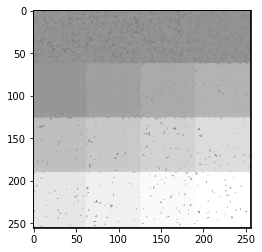

In [ ]:
img = cv.imread("/content/sample_data/e.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

noised_img = apply_uniform_noise(img, 100, 150)
filter_img = filtro_maximo(noised_img, 3)

plt.imshow(filter_img, cmap="gray", vmin=0, vmax=255)

print(sklearn.metrics.mean_absolute_error(img, filter_img))
print(sklearn.metrics.mean_squared_error(img, filter_img))
print(root_mean_square_error(img, filter_img))

# Resolução do exercício 6-b)

[[-1 -1 -1]
 [-1 17 -1]
 [-1 -1 -1]]


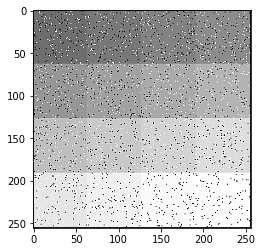

In [ ]:
img = cv.imread("/content/sample_data/e.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

probability = 0.05
salt_noised_img = skimage.util.random_noise(img, mode='s&p', amount=probability)*255

filter_img = filtro_passa_alta(salt_noised_img, 2)

plt.imshow(filter_img, cmap="gray", vmin=0, vmax=255)

[[-1 -1 -1]
 [-1 17 -1]
 [-1 -1 -1]]


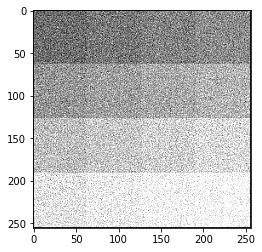

In [ ]:
img = cv.imread("/content/sample_data/e.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gaussian_noised_img = skimage.util.random_noise(img, mode='gaussian', mean=0, var=0.01)*255

filter_img = filtro_passa_alta(gaussian_noised_img, 2)

plt.imshow(filter_img, cmap="gray", vmin=0, vmax=255)

[[-1 -1 -1]
 [-1 17 -1]
 [-1 -1 -1]]


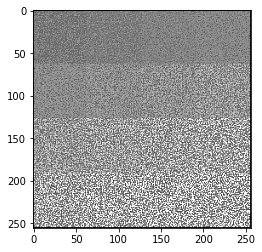

In [ ]:
img = cv.imread("/content/sample_data/e.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

noised_img = apply_uniform_noise(img, 100, 150)
filter_img = filtro_passa_alta(noised_img, 2)

plt.imshow(filter_img, cmap="gray", vmin=0, vmax=255)